In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip install glmnet
%pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: /home/szazo/.envs/glider/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: /home/szazo/.envs/glider/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


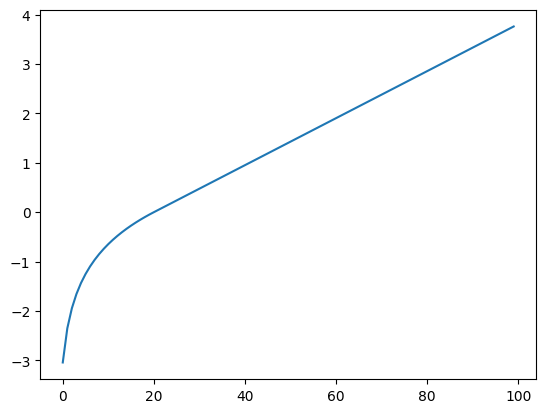

[-3.04452244 -2.35137526 -1.94591015 -1.65822808 -1.43508453 -1.25276297
 -1.09861229 -0.9650809  -0.84729786 -0.74193734 -0.64662716 -0.55961579
 -0.47957308 -0.40546511 -0.33647224 -0.27193372 -0.21130909 -0.15415068
 -0.10008346 -0.04879016  0.          0.04761905  0.0952381   0.14285714
  0.19047619  0.23809524  0.28571429  0.33333333  0.38095238  0.42857143
  0.47619048  0.52380952  0.57142857  0.61904762  0.66666667  0.71428571
  0.76190476  0.80952381  0.85714286  0.9047619   0.95238095  1.
  1.04761905  1.0952381   1.14285714  1.19047619  1.23809524  1.28571429
  1.33333333  1.38095238  1.42857143  1.47619048  1.52380952  1.57142857
  1.61904762  1.66666667  1.71428571  1.76190476  1.80952381  1.85714286
  1.9047619   1.95238095  2.          2.04761905  2.0952381   2.14285714
  2.19047619  2.23809524  2.28571429  2.33333333  2.38095238  2.42857143
  2.47619048  2.52380952  2.57142857  2.61904762  2.66666667  2.71428571
  2.76190476  2.80952381  2.85714286  2.9047619   2.9523809

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

def F(age: float, adult_age: float = 20.):
    
    if age <= adult_age:
        y = np.log(age + 1) - np.log(adult_age + 1)
    else:
        y = (age - adult_age) / (adult_age + 1)
    
    return y

age = np.arange(0, 100, 1)
y = np.vectorize(F)(age)

plt.plot(age, y)
plt.show()

print(y)



In [4]:
#import dask as dd



In [5]:
#%%time

#import pandas as pd
#from collections import defaultdict

#dtypes = defaultdict(lambda: 'float32')
#dtypes['ID_REF'] = 'string'

#print('loading...')
#feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0, usecols=range(0, 657)).transpose(copy=False)

#print('getting memory...')
#print(feature_df.info(verbose=False, memory_usage='deep'))

#feature_df

In [6]:
%%time

from assignment1 import Assignment1

job = Assignment1(meta_filepath='data/GSE40279_family.soft-MetaData.csv', features_filepath='data/GSE40279_average_beta.txt')

#meta_df = job.load_meta()
#features_df = job.load_features()
X, y = job.load()

processing...
['ID_REF']
CPU times: user 13.6 s, sys: 3.32 s, total: 16.9 s
Wall time: 14.4 s


In [17]:
import pandas as pd

model = job.train()
y.shape
type(y)
#meta_df = job.load_meta()
#meta_df

#features_df
#merged_df = meta_df.join(features_df)

#merged_df

X (524, 473034) (132, 473034)
Y (524,) (132,)


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   4 out of  10 | elapsed:   36.5s remaining:   54.8s


['alpha', 'n_lambda', 'min_lambda_ratio', 'lambda_path', 'standardize', 'lower_limits', 'upper_limits', 'fit_intercept', 'cut_point', 'n_splits', 'scoring', 'n_jobs', 'tol', 'max_iter', 'random_state', 'max_features', 'verbose', 'n_lambda_', 'intercept_path_', 'lambda_path_', 'jerr_', 'coef_path_', '_cv', 'cv_mean_score_', 'cv_standard_error_', 'lambda_max_inx_', 'lambda_max_', 'lambda_best_inx_', 'lambda_best_', 'coef_', 'intercept_', '__module__', '__doc__', '__init__', 'fit', '_fit', 'decision_function', 'predict', 'score', 'set_fit_request', 'set_predict_request', 'set_decision_function_request', 'set_score_request', '_get_param_names', 'get_params', 'set_params', '__sklearn_clone__', '__repr__', '__getstate__', '__setstate__', '_more_tags', '_get_tags', '_check_n_features', '_check_feature_names', '_validate_data', '_validate_params', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '__init_subclass__', '_build_request_for_signature', '_get_default_requests', '_get_metadata

[Parallel(n_jobs=20)]: Done  10 out of  10 | elapsed:   37.4s finished


numpy.ndarray

In [38]:
import numpy as np

print('n_lambda_', model.n_lambda_)
print('lambda_path_', model.lambda_path_)
print('coef_path_', model.coef_path_)
print('coef_', model.coef_, model.coef_.dtype)
print('coef_ nonzero', np.count_nonzero(np.invert(np.isclose(model.coef_, 0, atol=np.finfo(model.coef_.dtype).tiny, rtol=0))))
print('intercept_', model.intercept_)
print('intercept_', model.intercept_path_)


n_lambda_ 60
lambda_path_ [12.44071124 11.33551274 10.32849703  9.41094182  8.57489969  7.81312923
  7.11903237  6.48659715  5.91034574  5.38528691  4.90687287  4.4709598
  4.07377206  3.71186938  3.38211713  3.08165917  2.80789306  2.55844758
  2.33116215  2.12406813  1.93537177  1.76343868  1.60677964  1.46403777
  1.33397669  1.21546988  1.10749088  1.00910444  0.91945839  0.83777624
  0.76335051  0.69553655  0.633747    0.57744666  0.52614789  0.47940636
  0.43681722  0.39801159  0.36265333  0.33043621  0.30108117  0.27433395
  0.24996288  0.22775686  0.20752357  0.18908775  0.17228971  0.15698397
  0.14303795  0.13033085  0.11875262  0.10820296  0.09859051  0.089832
  0.08185157  0.0745801   0.06795461  0.06191771  0.05641711  0.05140517]
coef_path_ [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
coef_ [0. 0. 0. ... 0. 0. 0.] float64
coef_ nonzero 78
intercept_ 18.8341891450

In [ ]:
import pandas as pd

meta_df = pd.read_csv('data/GSE40279_family.soft-MetaData.csv', delimiter='|')

# split sample title to get the id
meta_df.str.split(' ', )

display(meta_df.head())
print('size: ', meta_df.shape)

feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0).T

#feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0)

display(feature_df.head())
print('size: ',feature_df.shape)



In [ ]:
from sklearn.model_selection import train_test_split

y = meta_df['age (y)'].astype(float)
print(y, type(y))

X_train, X_test, y_train, y_test = train_test_split(feature_df, y, test_size=0.2, random_state=42)

print('X', X_train.shape, X_test.shape)
print('Y', y_train.shape, y_test.shape)

In [ ]:
from glmnet import ElasticNet

model = ElasticNet()
model = model.fit(X_train, y_train)

print(model)

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
#print(y_pred)

# compare with the y_test
print('explained_variance_score', explained_variance_score(y_test, y_pred))
print('root_mean_squared_error', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2', np.sqrt(r2_score(y_test, y_pred)))
